In [1]:
from random_stock_price_generator import RandomStockPrices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Taking a look at the distribution of initial prices..

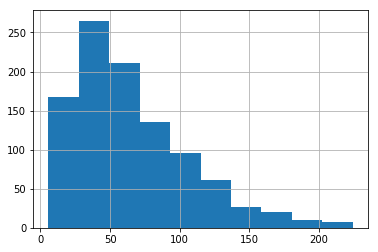

In [2]:
rp = RandomStockPrices(years=55)
prices = rp.prices
returns = rp.returns
initial_prices = prices.iloc[0,:].hist()

In [3]:
prices.head()
returns.head()

,TICK0,TICK1,TICK2,TICK3,TICK4,TICK5,TICK6,TICK7,TICK8,TICK9,...,TICK990,TICK991,TICK992,TICK993,TICK994,TICK995,TICK996,TICK997,TICK998,TICK999
1956-01-02,0.011652,-0.015295,0.000764,0.009772,-0.004165,0.006056,0.000141,-0.000760,-0.002620,0.003392,...,0.005965,0.005573,0.006246,0.017268,-0.001233,-0.004097,0.001598,-0.000158,-0.005478,-0.000341
1956-01-03,0.009894,0.008594,0.004582,-0.018816,0.003157,-0.005979,-0.011662,0.020431,0.003167,0.003340,...,-0.002430,0.012737,-0.007749,0.016060,0.001808,0.000382,-0.010687,-0.000464,-0.017609,-0.003270
1956-01-04,-0.004631,0.002066,-0.006818,-0.002342,0.018332,-0.004158,-0.001272,0.010752,0.000029,0.020594,...,0.005291,-0.006235,-0.001374,0.006757,0.001245,0.007791,0.013817,0.012006,-0.012928,-0.006789
1956-01-05,0.013376,0.007413,0.002310,0.006357,0.012058,0.004248,0.003237,-0.009689,-0.003373,0.027553,...,-0.016913,0.003986,0.005540,0.007042,-0.005919,-0.012224,-0.012055,-0.004932,-0.002224,0.020080
1956-01-06,-0.012040,0.029935,-0.009133,0.000143,0.013194,0.003577,-0.003896,-0.005351,0.005466,-0.017148,...,-0.010932,-0.010286,-0.008133,-0.009390,0.000195,-0.010382,-0.007033,0.002497,-0.017870,-0.010703


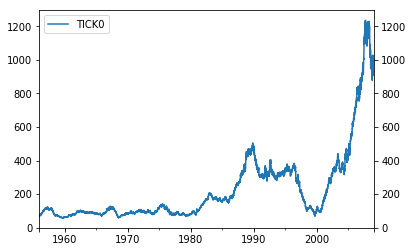

In [4]:
first_plot = prices[['TICK0']].plot()
first_plot.tick_params(labelright=True, right=True)
plt.show()

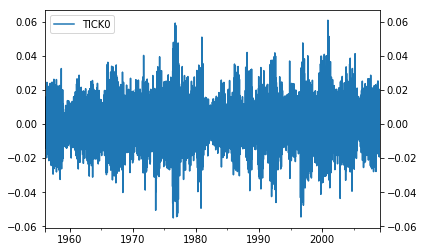

In [5]:
returns_first_plot = returns[['TICK0']].plot()
returns_first_plot.tick_params(labelright=True, right=True)
plt.show()

## Getting the distribution of the first stock based on its simulated historical data

In [6]:
first_returns = returns[['TICK0']].values
mu = round(first_returns.mean() * 252, 4)
std = round(first_returns.std() * np.sqrt(252), 4)
print('mean is : ', mu)
print('std is : ', std)

mean is :  0.0475
std is :  0.1765


In [7]:
def analyze_dists(returns, years):
    days = years * 252
    mus = []
    stds = []
    for i in range(len(returns.columns)):
        rets = returns[['TICK{}'.format(i)]].values[0:days]
        mu = rets.mean()*252
        std = rets.std()*np.sqrt(252)
        mus.append(mu)
        stds.append(std)

    
    plt.hist(mus)
    plt.show()
    print('avg mu: {0:.4f}'.format(np.mean(mus)))
    print('avg std: {0:.4f}'.format(np.mean(stds)))
    print('avg initial price: {0:.4f}'.format(prices.iloc[0,:].mean()))
    print('avg ending price: {0:.4f}'.format(prices.iloc[252*years,:].mean()))


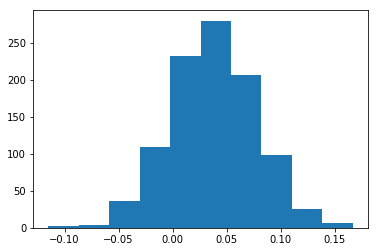

avg mu: 0.0377
avg std: 0.1669
avg initial price: 65.0415
avg ending price: 187.8028


In [8]:
analyze_dists(returns, 20)

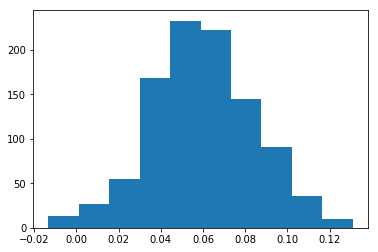

avg mu: 0.0599
avg std: 0.1677
avg initial price: 65.0415
avg ending price: 2807.2068


In [9]:
analyze_dists(returns, 50)

In [10]:
def analyze_annual_returns(returns, prices, years):
    means = []
    rets = []
    for i in range(years):
        start_day = i * 252
        end_day = 252 * (i+1)
        ret = (prices.iloc[end_day,:] - prices.iloc[start_day,:]) / prices.iloc[start_day,:]
        rets.append(ret)
        means.append(ret.mean())
    print('this is means: ', means)
    print('the mean return per year was: {:.4f}%'.format(100*round(np.mean(means), 4)))
    print('std of annual returns: {:.4f}'.format(round(np.std(means), 4)))
    return rets

In [11]:
rets = analyze_annual_returns(returns, prices, 50)

this is means:  [0.22500936196603044, 0.06232019938070413, -0.22445992434528744, -0.04829831094530677, 0.26389709436074993, -0.08134599738343229, 0.2050024832225986, -0.17165125404294, 0.2398915819232303, 0.10550983199963107, 0.13644103229951354, 0.3045534991088933, -0.20789845038690538, 0.22627037481216414, 0.09550151825539546, 0.0016483791501032718, -0.18900076364623178, 0.23133688907633174, -0.04670779916045304, 0.25423739399215145, 0.027100588056791417, -0.010983708668428618, 0.02180766631426631, 0.002921392936067722, 0.08786208575266931, 0.09948686063549837, 0.46989842839818063, 0.4458251366059339, -0.18527244382688754, -0.048734154801375495, 0.1927793243572674, 0.22174526522096305, 0.2584037042986408, 0.49010644894421385, 0.20266975978372995, 0.03765789171758626, 0.04302719123349991, -0.12948537686590375, -0.22689640107764766, -0.029728627612775966, 0.11609703970050206, -0.04922225195653858, 0.06414423477020088, -0.32597613169540207, -0.02800486108005542, 0.0338474124255578, 0.78

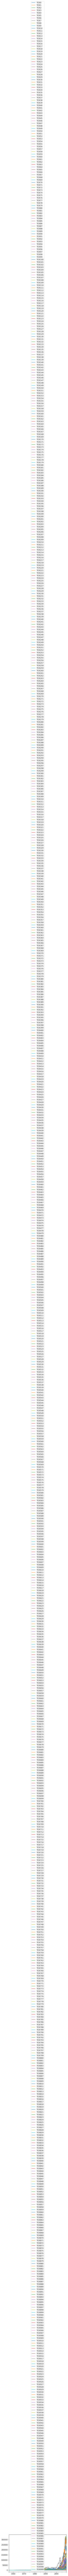

In [12]:
prices.plot()

In [24]:
np.mean(returns.iloc[:,199]

1956-01-02    0.004842
1956-01-03   -0.005428
1956-01-04    0.005211
1956-01-05    0.010701
1956-01-06    0.008857
1956-01-09   -0.016596
1956-01-10   -0.015483
1956-01-11   -0.000810
1956-01-12   -0.002844
1956-01-13    0.005326
1956-01-16    0.001804
1956-01-17    0.018664
1956-01-18   -0.005736
1956-01-19   -0.026532
1956-01-20    0.008596
1956-01-23    0.003282
1956-01-24    0.013874
1956-01-25   -0.004552
1956-01-26   -0.010418
1956-01-27   -0.018937
1956-01-30   -0.006023
1956-01-31   -0.015653
1956-02-01   -0.010686
1956-02-02    0.015891
1956-02-03   -0.012722
1956-02-06    0.006137
1956-02-07    0.006098
1956-02-08    0.000503
1956-02-09   -0.019835
1956-02-10   -0.018414
                ...   
2009-01-05   -0.011793
2009-01-06   -0.001213
2009-01-07   -0.010574
2009-01-08   -0.000384
2009-01-09   -0.005356
2009-01-12   -0.004500
2009-01-13    0.008754
2009-01-14   -0.003639
2009-01-15   -0.005393
2009-01-16   -0.006640
2009-01-19   -0.001024
2009-01-20    0.015236
2009-01-21 